In [ ]:
%pylab inline
!pip install uncertainties
from uncertainties import ufloat
from uncertainties.umath import * 
import pandas as pd
import scipy as sp
from uncertainties import unumpy
from scipy.constants import *
from scipy import stats
from scipy.signal import find_peaks
import csv
from collections import Counter

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import requests
PrecipitacionB = requests.get('https://www.datos.gov.co/resource/s54a-sgyg.json?departamento=BOGOTA&$limit=500000&codigoestacion=0021205012')
PresionB = requests.get("https://www.datos.gov.co/resource/62tk-nxj5.json?departamento=BOGOTA&$limit=500000&codigoestacion=0021205012")

In [ ]:
RB = PrecipitacionB.json()
shape(RB)

(426485,)

In [ ]:
PB = PresionB.json()
shape(PB)

(71126,)

In [ ]:
J = []
for i in RB:
    J.append(i['fechaobservacion'])
J = sort(J)
J

array(['2010-07-15T00:10:00.000', '2010-07-15T00:20:00.000',
       '2010-07-15T00:30:00.000', ..., '2022-02-07T20:30:00.000',
       '2022-02-07T20:40:00.000', '2022-02-07T20:50:00.000'], dtype='<U23')

In [ ]:
RlB = []
PlB = []
for i in RB:
    # i['fechaobservacion'] = i['fechaobservacion'][:-13].split('-')
    if i['valorobservado'] != '0':
        RlB.append([i['fechaobservacion'],i['valorobservado']])
    # A = Date[i].replace(' 12:00:00 AM', '')
    # Date[i] = A.split('/')
for i in PB:
    # i['fechaobservacion'] = i['fechaobservacion'][:-13].split('-')
    PlB.append([i['fechaobservacion'],i['valorobservado']])

In [ ]:
RlB = sorted(RlB)
FUCKB = []
for i in RlB[0:]:
    if i[0][-9:] =='00:00.000':
        FUCKB.append(i)
PlB = sorted(PlB)
# Rl = Rl[5::6]
del PlB[:24]

In [ ]:
shape(FUCKB)

(2778, 2)

In [ ]:
shape(PlB)

(71102, 2)

In [ ]:
SHITB = []
for i in PlB:
    for j in FUCKB:
        if j[0] == i[0]:
            SHITB.append(i)

In [ ]:
shape(SHITB)

(2847, 2)

In [ ]:
def fixB(a,b):
    A = shape(SHITB)[0]
    B = shape(FUCKB)[0]
    for i in (range(a,b)):
        if SHITB[i][0] != FUCKB[i][0] and A<B:
            del FUCKB[i]
            fixB(i,min(A,B))
        elif SHITB[i][0] != FUCKB[i][0] and A>B:
            del SHITB[i]
            fixB(i,min(A,B))
fixB(0,3000)

IndexError: ignored

In [ ]:
AB = []
BB = []
for i in range(shape(FUCKB)[0]):
    AB.append((FUCKB[i][1]))
    BB.append((SHITB[i][1]))

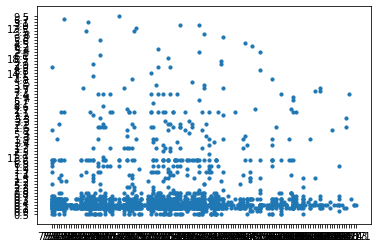

In [ ]:
scatter(BB,AB, s=10)

In [ ]:
import requests
Precipitacion = requests.get('https://www.datos.gov.co/resource/s54a-sgyg.json?departamento=BOYACÁ&$limit=600000&codigoestacion=0024035410')
Presion = requests.get("https://www.datos.gov.co/resource/62tk-nxj5.json?departamento=BOYACÁ&$limit=500000&codigoestacion=0024035410")

In [ ]:
R = Precipitacion.json()
shape(R)

(600000,)

In [ ]:
P = Presion.json()
shape(P)

(107116,)

In [ ]:
J = []
for i in R:
    J.append(i['fechaobservacion'])
J = sort(J)
J

array(['2008-05-08T05:20:00.000', '2008-05-08T05:30:00.000',
       '2008-05-08T11:00:00.000', ..., '2020-07-26T23:40:00.000',
       '2020-07-26T23:50:00.000', '2020-08-10T02:30:00.000'], dtype='<U23')

In [ ]:
Rl = []
Pl = []
for i in R:
    # i['fechaobservacion'] = i['fechaobservacion'][:-13].split('-')
    if i['valorobservado'] != '0':
        Rl.append([i['fechaobservacion'],i['valorobservado']])
    # A = Date[i].replace(' 12:00:00 AM', '')
    # Date[i] = A.split('/')
for i in P:
    # i['fechaobservacion'] = i['fechaobservacion'][:-13].split('-')
    Pl.append([i['fechaobservacion'],i['valorobservado']])

In [ ]:
Rl = sorted(Rl)
FUCK = []
for i in Rl[0:]:
    if i[0][-9:] =='00:00.000':
        FUCK.append(i)
Pl = sorted(Pl)
# Rl = Rl[5::6]
# del Pl[:24]

In [ ]:
shape(FUCK)

(3469, 2)

In [ ]:
shape(Pl)

(107116, 2)

In [ ]:
SHIT = []
for i in Pl:
    for j in FUCK:
        if j[0] == i[0]:
            SHIT.append(i)

In [ ]:
shape(SHIT)

(3430, 2)

In [ ]:
def fix(a,b):
    A = shape(SHIT)[0]
    B = shape(FUCK)[0]
    for i in (range(a,b)):
        if SHIT[i][0] != FUCK[i][0] and A<B:
            del FUCK[i]
            fix(i,min(A,B))
        elif SHIT[i][0] != FUCK[i][0] and A>B:
            del SHIT[i]
            fix(i,min(A,B))
fix(0,4000)

IndexError: ignored

In [ ]:
A = []
B = []
for i in range(shape(FUCK)[0]):
    A.append((FUCK[i][1]))
    B.append((SHIT[i][1]))

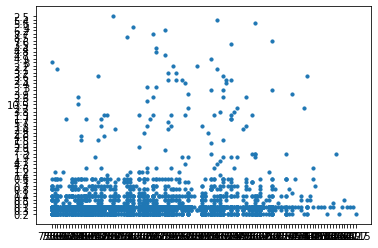

In [ ]:
scatter(B,A, s = 10)

In [ ]:
BB = sort(BB)
nB = len(BB)
cumulativaB = np.linspace(1.0/nB, 1.0, nB)
B = sort(B)
n = len(B)
cumulativa = np.linspace(1.0/n, 1.0, n)

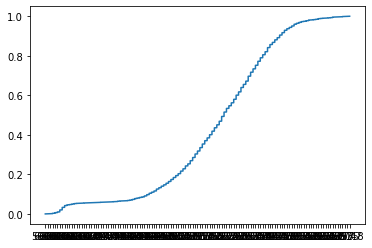

In [ ]:
plt.plot(BB, cumulativaB)

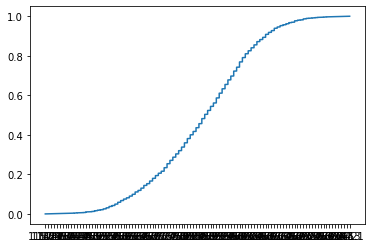

In [ ]:
plt.plot(B, cumulativa)

In [ ]:
real_diff = np.mean([float(item) for item in B]) - np.mean([float(item) for item in BB])
real_diff

15.688077144921976

In [ ]:
n_iteraciones = 50000
diffs = np.zeros(n_iteraciones)
for i in range(n_iteraciones):
    # print('antes', final)
    # np.random.shuffle(final)
    # print('despues', final)
    np.random.shuffle(B)
    np.random.shuffle(BB)
    BB_fake = BB[:len(BB)]
    B_fake = B[len(BB):]
    # print(np.mean(final), np.mean(notas_fake_f))
    diffs[i] = np.mean([float(item) for item in B_fake]) - np.mean([float(item) for item in BB_fake])

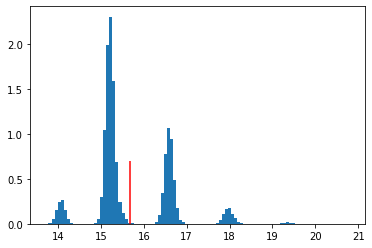

In [ ]:
_ = plt.hist(diffs, bins = 100, density = True)
plt.vlines(real_diff, 0, 0.7, color = 'r')

In [ ]:
diffs

array([15.12015436, 15.16437878, 16.5795603 , ..., 15.28484083,
       16.47064941, 13.88187053])

In [ ]:
frac_altos = np.count_nonzero(diffs>real_diff)/len(diffs)
frac_altos #menor a 0.005 (not sure if it's 0.05 or 0.005) es significativo

0.33666

In [ ]:
AB = sort(AB)
nB = len(AB)
cumulativaB = np.linspace(1.0/nB, 1.0, nB)
A = sort(A)
n = len(A)
cumulativa = np.linspace(1.0/n, 1.0, n)

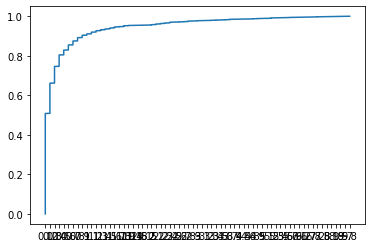

In [ ]:
plt.plot(AB, cumulativaB)

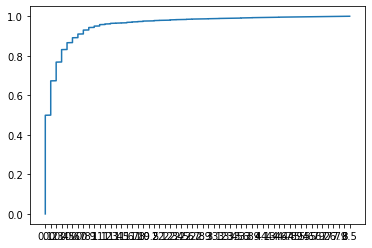

In [ ]:
plt.plot(A, cumulativa)

In [ ]:
real_diff = np.mean([float(item) for item in A]) - np.mean([float(item) for item in AB])
real_diff

-0.11274136019958586

In [ ]:
n_iteraciones = 50000
diffs = np.zeros(n_iteraciones)
for i in range(n_iteraciones):
    # print('antes', final)
    # np.random.shuffle(final)
    # print('despues', final)
    np.random.shuffle(A)
    np.random.shuffle(AB)
    AB_fake = AB[:len(AB)]
    A_fake = A[len(AB):]
    # print(np.mean(final), np.mean(notas_fake_f))
    diffs[i] = np.mean([float(item) for item in A_fake]) - np.mean([float(item) for item in AB_fake])

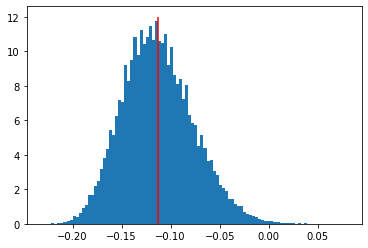

In [ ]:
_ = plt.hist(diffs, bins = 100, density = True)
plt.vlines(real_diff, 0, 12, color = 'r')

In [ ]:
frac_altos = np.count_nonzero(diffs>real_diff)/len(diffs)
frac_altos #menor a 0.005 (not sure if it's 0.05 or 0.005) es significativo

0.47318